### LIBRARIES

In [35]:
import numpy as np
from skimage.io import imread
from skimage import color, data, restoration
from scipy.signal import convolve2d
from skimage.util import random_noise
import matplotlib.pyplot as plt

### Plot Function

In [36]:
# plot function
def display(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

### Original Image

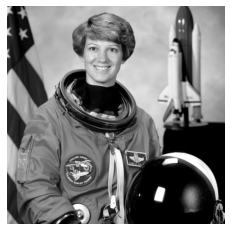

In [38]:
# original image
img = color.rgb2gray(data.astronaut())
display(img)

### Image Degradation

In [50]:
# point spread function: kernel
k = 5
psf = np.ones((k,k)) / (k*k)
psf

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

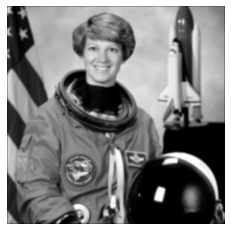

In [51]:
# blur the image
img1 = convolve2d(img, psf, 'same')
display(img1)

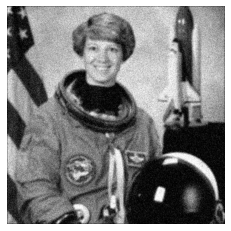

In [52]:
# add a noise to blur image
img1 = random_noise(img1, mode='gaussian')
display(img1)

### Image Restoration

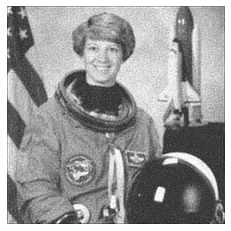

In [90]:
# image restoration: unsupervised_wiener()
imgRestor, chains = restoration.unsupervised_wiener(img1, psf=psf)
display(imgRestor)

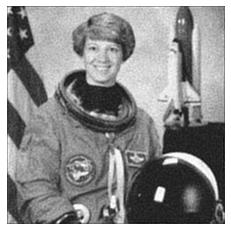

In [93]:
# image restoration: wiener()
imgRestor2 = restoration.wiener(img1, psf=psf, balance=0.35)
display(imgRestor2)

### Evaluate the Results

In [84]:
# evaluate the result
from skimage.metrics import peak_signal_noise_ratio

In [94]:
psnr0 = peak_signal_noise_ratio(image_true=img, image_test=img1)
psnr1 = peak_signal_noise_ratio(image_true=img, image_test=imgRestor)
psnr2 = peak_signal_noise_ratio(image_true=img, image_test=imgRestor2)

print(f"PSNR blur image: {psnr0:.3f}")
print(f"PSNR method 1: {psnr1:.3f}")
print(f"PSNR method 2: {psnr2:.3f}")

PSNR blur image: 19.338
PSNR method 1: 22.342
PSNR method 2: 24.128


Although a higher PSNR generally indicates that the reconstruction is of higher quality, in some cases it may not.: https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio